**Preparing data:** Run the next cells to download and prepare the datasets and util functions.

In [2]:
import sys
download_data = False

if 'google.colab' in sys.modules:
    download_data = True

In [3]:
if download_data:
    !wget --no-cache -O init.py -q https://raw.githubusercontent.com/DaielChom/ann_leaf_classification/master/init.py
    from init import download_utils, unzip_leaf_dataset, dataset_dir
    download_utils(force_download=False)

In [4]:
if download_data:
    !mkdir ./local/datasets/
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo" -O local/datasets/sales.zip && rm -rf /tmp/cookies.txt

In [5]:
if download_data:
    unzip_leaf_dataset()

**Libraries**

In [21]:
import random
import numpy as np
import progressbar
import pandas as pd
import matplotlib.pyplot as plt
import local.lib as lib


from init import dataset_dir

# Explore dataset
**Note:** We asume that if there are NaN is because the shop doesn't sell a product

In [8]:
shop_item, signals = lib.get_base_dataset(dataset_dir)
shop_item.head()

,2_32,3_32,4_32,5_32,6_32,7_32,10_32,13_32,14_32,15_32,...,41_22167,42_22167,43_22167,44_22167,47_22167,50_22167,52_22167,53_22167,54_22167,56_22167
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,0.0,3.0,2.0,0.0,8.0,1.0,0.0,6.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-28,0.0,0.0,1.0,2.0,10.0,2.0,0.0,3.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-03-31,0.0,2.0,4.0,7.0,10.0,6.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-30,0.0,0.0,0.0,1.0,1.0,3.0,0.0,6.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-31,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
signals_sample = random.choices(signals, k=10)
signals_sample

['15_16209',
 '56_6490',
 '38_5655',
 '30_4886',
 '15_21377',
 '4_1857',
 '41_2574',
 '29_1495',
 '16_21404',
 '59_16014']

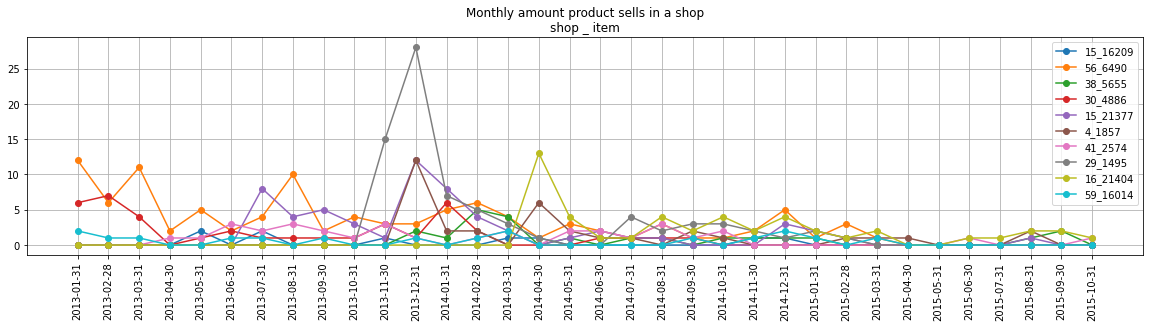

In [34]:
plt.figure(figsize=(20, 4))
for signal in signals_sample:
    aux = shop_item[signal]
    plt.plot(aux.index, aux.values, marker="o", label=signal)

plt.grid()
plt.xticks(rotation="vertical");
plt.title("Monthly amount product sells in a shop\nshop _ item")
plt.legend()

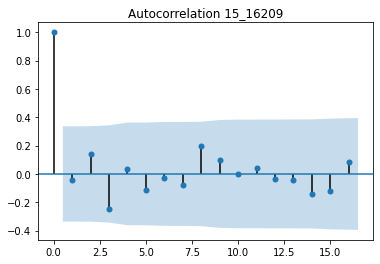

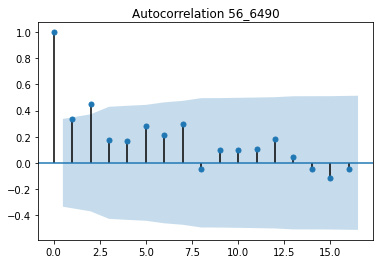

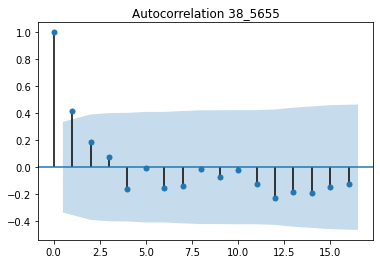

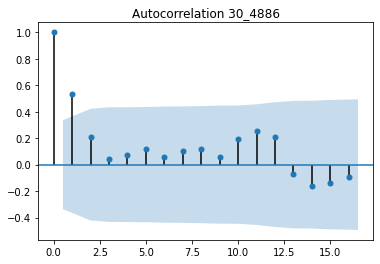

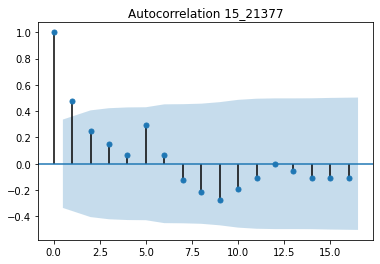

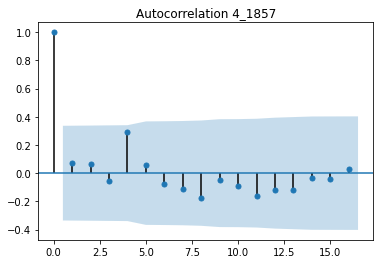

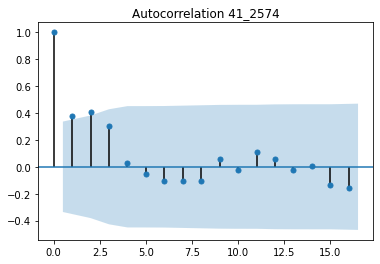

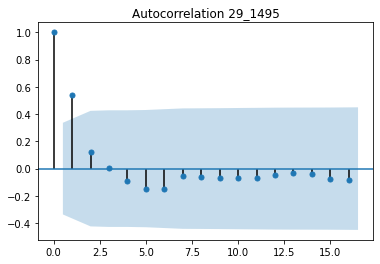

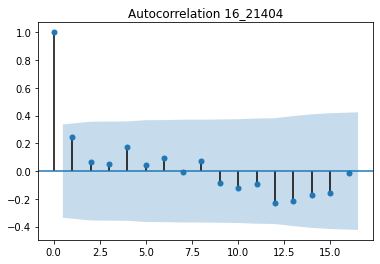

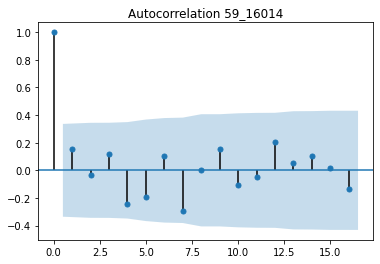

In [51]:
from statsmodels.graphics.tsaplots import plot_acf


for signal in signals_sample:
    aux = shop_item[signal]
    plot_acf(aux.to_frame())
    plt.title("Autocorrelation {}".format(signal))
    plt.show()

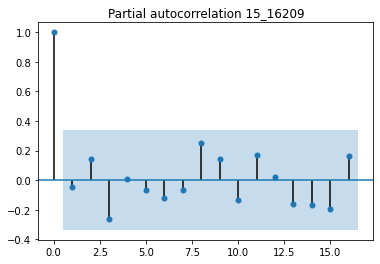

/home/daielchom/Documents/envs/sales/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


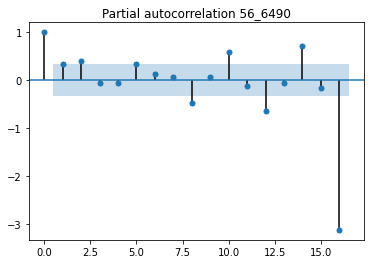

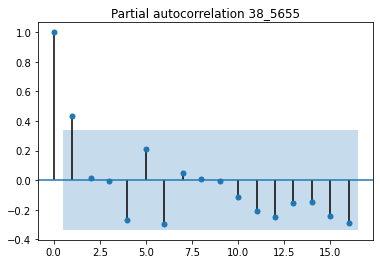

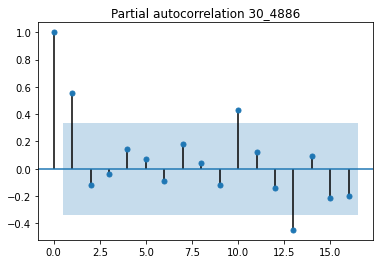

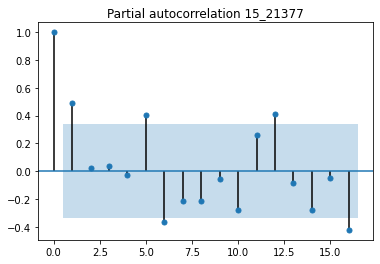

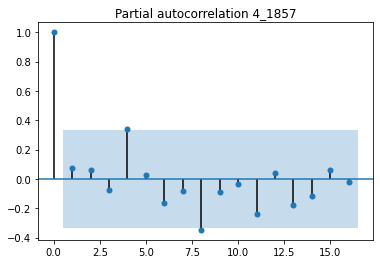

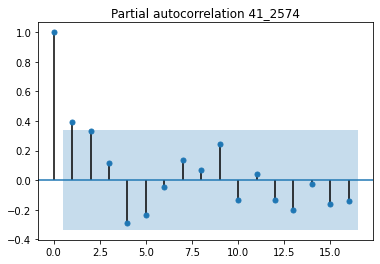

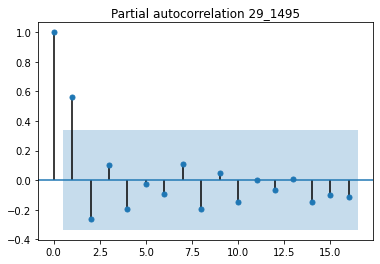

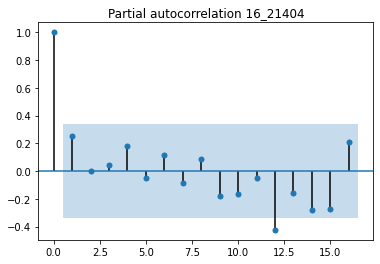

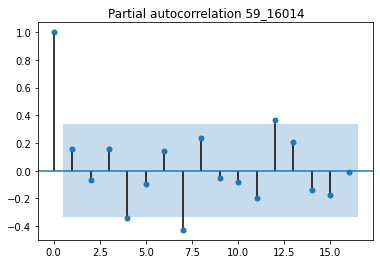

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf


for signal in signals_sample:
    aux = shop_item[signal]
    plot_pacf(aux.to_frame())
    plt.title("Partial autocorrelation {}".format(signal))
    plt.show()